In [2]:
import pandas as pd
import numpy as np
import sys
sys.path.append('/mnt/proj/adas-daas/common_libraries/adas_mtd/')
import src.data.utils.db_helper as dbh

In [7]:
recording_id = ['FH2369_20220322_141936','FH2467_20220322_125702']

In [12]:
all_recording_ids_road_type_tag = dbh.read_db_to_df('all_recording_ids_road_type_tag', 'da_gds')

TypeError: Additional arguments should be named <dialectname>_<argument>, got 'autoload'

In [6]:
road_type = dbh.read_db_to_df('all_recording_ids_road_type_tag', 'da_gds')

TypeError: Additional arguments should be named <dialectname>_<argument>, got 'autoload'

In [ ]:
all_recording_ids_road_type_tag

,recording_id,file_name,segment,tag_name_list,start_datetime,end_datetime,write_to_db_date
0,FH2369_20220128_064536,FH2369_20220128_064536_Bsw_ImgFrntRaw_000.mp4,0.0,"[Road, Infrastructure, Overhead bridge]",2022-01-28 06:48:26.994,2022-01-28 06:48:27.994,2022/09/14_15:39:47
1,FH2369_20220128_064536,FH2369_20220128_064536_Bsw_ImgRiRaw_000.mp4,0.0,"[Road, Infrastructure, Overhead bridge]",2022-01-28 06:48:26.994,2022-01-28 06:48:27.994,2022/09/14_15:39:47
2,FH2369_20220128_064536,FH2369_20220128_064536_Bsw_ImgReLeRaw_000.mp4,0.0,"[Road, Infrastructure, Overhead bridge]",2022-01-28 06:48:26.994,2022-01-28 06:48:27.994,2022/09/14_15:39:47
3,FH2369_20220128_064536,FH2369_20220128_064536_Bsw_ImgReRiRaw_000.mp4,0.0,"[Road, Infrastructure, Overhead bridge]",2022-01-28 06:48:26.994,2022-01-28 06:48:27.994,2022/09/14_15:39:47
4,FH2369_20220128_064536,FH2369_20220128_064536_Bsw_ImgLeRaw_000.mp4,0.0,"[Road, Infrastructure, Overhead bridge]",2022-01-28 06:48:26.994,2022-01-28 06:48:27.994,2022/09/14_15:39:47
...,...,...,...,...,...,...,...
582933,UDM523_20220621_063547,None,NaN,None,NaT,NaT,2022/09/14_15:39:47
582934,UDM523_20220622_043948,None,NaN,None,NaT,NaT,2022/09/14_15:39:47
582935,UDM523_20220622_073944,None,NaN,None,NaT,NaT,2022/09/14_15:39:47
582936,UDM523_20220624_032345,None,NaN,None,NaT,NaT,2022/09/14_15:39:47


In [ ]:
all_recording_ids_road_type_tag['tag_name_list'].unique()

array(['[Road, Infrastructure, Overhead bridge]',
       '[Road, Type, Minor road public]', '[Road, Geometry, Crests]',
       '[Road, Type, Motorway]', '[Road, Geometry, Highway exit]',
       '[Road, Infrastructure, Traffic light]', None,
       '[Road, Infrastructure, Overhead sign]',
       '[Road, Type, City street]', '[Road, Infrastructure, Speed sign]',
       '[Road, Infrastructure, Tunnel]',
       '[Road, Geometry, 2-1 Lane merge]',
       '[Road, Geometry, 1-2 Lane split and off ramps]',
       '[Road, Infrastructure, Construction site]',
       '[Road, Type, Primary highway]', '[Road, Type, Secondary highway]',
       '[Road, Type, City Thoroughfare]', '[Road, Geometry, Roundabout]',
       '[Road, Type, Minor road enclosed]',
       '[Road, Infrastructure, Toll booth]',
       '[Road, Infrastructure, National border crossing]',
       '[Road, Type, Off-road]'], dtype=object)

In [ ]:
road_type = all_recording_ids_road_type_tag[((all_recording_ids_road_type_tag['tag_name_list'] == '[Road, Type, Primary highway]')\
            |(all_recording_ids_road_type_tag['tag_name_list'] == '[Road, Type, Secondary highway]') \
            |(all_recording_ids_road_type_tag['tag_name_list'] == '[Road, Type, Motorway]')) & ((all_recording_ids_road_type_tag['recording_id'] == recording_id[0]))]

In [ ]:
# np.sort(road_type['start_datetime'].unique())
highway_time = road_type[['start_datetime','end_datetime']].drop_duplicates().sort_values(by=['start_datetime'])

In [ ]:
highway_time

,start_datetime,end_datetime
254233,2022-03-22 14:19:47.506,2022-03-22 14:27:51.505
254573,2022-03-22 14:28:27.505,2022-03-22 14:36:02.505
254618,2022-03-22 14:36:05.505,2022-03-22 14:36:29.505
254293,2022-03-22 14:41:32.505,2022-03-22 14:42:02.505
254313,2022-03-22 14:42:03.505,2022-03-22 14:43:22.505
254323,2022-03-22 14:44:00.505,2022-03-22 14:45:14.505
254378,2022-03-22 14:52:56.406,2022-03-22 14:57:39.406
254368,2022-03-22 14:57:41.406,2022-03-22 14:59:26.405
254408,2022-03-22 14:59:27.405,2022-03-22 15:00:09.405
254483,2022-03-22 15:04:59.405,2022-03-22 15:08:18.405


In [ ]:
# sys.path.append('/mnt/proj/adas-daas/team_data_analysis/Lingbin_Bokuan')

In [8]:
config_path = '../config.yaml'

In [9]:
from scripts.dataloader import OnlineSpark
session = OnlineSpark(config_path,size='small')

In [7]:
session.path_dict

NameError: name 'session' is not defined

Reference V2 instruction: https://volvogroup.sharepoint.com/:x:/r/sites/unit-dava/_layouts/15/Doc.aspx?sourcedoc=%7B8353B7B1-9F7B-40B7-8212-14DD6E5AEC15%7D&file=OSI_parquet_naming_conventions_explanations.xlsx&action=default&mobileredirect=true

In [8]:
ego = session.loadParquet('avl_reference','ego',record_id=recording_id[0])

In [9]:
ego.show(100)

+---------------+-------------+-------------+-------------------+------------------+--------------------+--------------------+--------------------+------------------+-------------------+------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------+----------+-----------------+
|       ptp_time|MessageNumber|ReferenceType|          PositionX|         PositionY|           PositionZ|                Roll|               Pitch|               Yaw|          VelocityX|         VelocityY|          VelocityZ|       AccelerationX|       AccelerationY|       AccelerationZ|            RollRate|           PitchRate|             YawRate|        recording_id|vehicle|sw_version|__index_level_0__|
+---------------+-------------+-------------+-------------------+------------------+--------------------+--------------------+--------------------+------------------+--------------

AttributeError: 'DataFrame' object has no attribute 'dtype'

In [10]:
line = session.loadParquet('avl_reference','line',record_id=recording_id[0])

In [11]:
line.show(5)

+---------------+-------------+-------------+----------+------------+----+-----+--------------------+--------------------+--------------------+--------------------+-------+----------+-----------------+
|       ptp_time|MessageNumber|ReferenceType|TrackingID|SensorIDList|Type|Color|       BoundaryLineX|       BoundaryLineY|       BoundaryLineZ|        recording_id|vehicle|sw_version|__index_level_0__|
+---------------+-------------+-------------+----------+------------+----+-----+--------------------+--------------------+--------------------+--------------------+-------+----------+-----------------+
|1.64795877671E9|            0|         Line|       4.0|       100.0| 4.0|  3.0|[3.58450984954834...|[13.4302139282226...|[-4.0568375587463...|FH2369_20220322_1...| FH2369|     1.1.8|                0|
|1.64795877671E9|            0|         Line|       5.0|       100.0| 3.0|  3.0|[7.44267940521240...|[10.0110597610473...|[-4.2979311943054...|FH2369_20220322_1...| FH2369|     1.1.8|         

In [12]:
line.count()

680259

In [13]:
type(line)

pyspark.sql.dataframe.DataFrame

In [14]:
import time
from datetime import datetime

time_interval = ['2022-03-22 14:52:56.406', '2022-03-22 15:00:09.405']
ptp_time_range = [int(pd.to_datetime(time_interval[0],format= '%Y-%m-%d %H:%M:%S.%f' ).timestamp()),
                  int(pd.to_datetime(time_interval[1],format= '%Y-%m-%d %H:%M:%S.%f' ).timestamp())]


In [15]:
ptp_time_range[1]

1647961209

In [16]:
line_sample = line.filter(line.ptp_time.between(ptp_time_range[0],ptp_time_range[1])).toPandas()
pd.options.display.float_format = '{:.0f}'.format

In [6]:
line_sample

NameError: name 'line_sample' is not defined

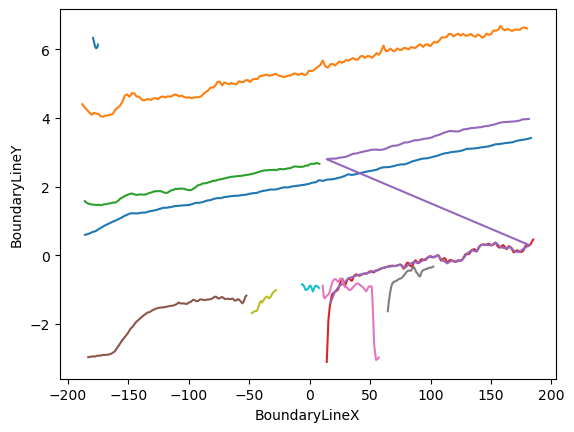

In [50]:
import matplotlib.pyplot as plt
ptp_time = line_sample.iloc[12660]['ptp_time']
filtered_df = line_sample[line_sample['ptp_time'] == ptp_time]

merged_lines = []

for index, row in filtered_df.iterrows():
    if not merged_lines or row['TrackingID'] != merged_lines[-1]['TrackingID']:
        merged_lines.append(row)
    else:
        merged_lines[-1]['BoundaryLineX'].extend(row['BoundaryLineX'])
        merged_lines[-1]['BoundaryLineY'].extend(row['BoundaryLineY'])


for merged_line in merged_lines:
    plt.plot(merged_line['BoundaryLineX'], merged_line['BoundaryLineY'], label=f'Tracking ID {merged_line["TrackingID"]}')

plt.xlabel('BoundaryLineX')
plt.ylabel('BoundaryLineY')

plt.show()

In [26]:
test_line = 12662

In [20]:
from sklearn.linear_model import LinearRegression
def get_straightness(BoundaryLineX: list[float], BoundaryLineY: list[float])-> float:
    BoundaryLineX_array = np.array(BoundaryLineX)
    BoundaryLineX_reshaped = BoundaryLineX_array.reshape(-1, 1)
    model = LinearRegression().fit(BoundaryLineX_reshaped, BoundaryLineY)
    straightness = model.score(BoundaryLineX_reshaped, BoundaryLineY)
    return straightness


In [49]:
get_straightness(line_sample.iloc[test_line]['BoundaryLineX'], line_sample.iloc[test_line]['BoundaryLineY'])

0.9845700588822551

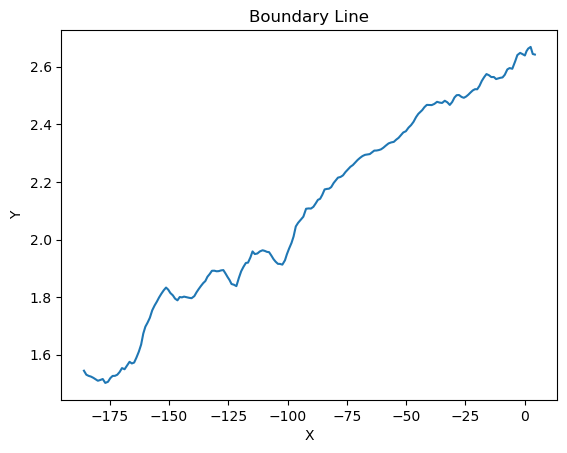

In [48]:
test_line = 12679
x_values = line_sample.iloc[test_line]['BoundaryLineX']
y_values = line_sample.iloc[test_line]['BoundaryLineY']

plt.plot(x_values, y_values)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Boundary Line')
plt.show()

In [ ]:
def get_length(segment):
    segment_lengths = []
    for i in range(len(segment['BoundaryLineX']) - 1):
        x1, y1 = segment['BoundaryLineX'][i], segment['BoundaryLineY'][i]
        x2, y2 = segment['BoundaryLineX'][i + 1], segment['BoundaryLineY'][i + 1]
        segment_length = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
        segment_lengths.append(segment_length)
    return sum(segment_lengths)

In [4]:
def if_straight(line_data: pd.DataFrame, ptp_time: int) -> bool:
    mask = line_data['ptp_time'] == ptp_time
    segments = line_data[mask]
    straight_length = 0
    total_length = 0
    for index, segment in segments.iterrows():
        print(segment)
        segment_length = get_length(segment)
        total_length += segment_length
        straightness = get_straightness(segment['BoundaryLineX'],segment['BoundaryLineY'])
        if straightness > 0.94:
            straight_length += segment_length
    return True if straight_length/total_length > 0.5 else False

In [1]:
1647960776
if_straight(line_sample, 1647960776)

NameError: name 'if_straight' is not defined